In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-risk-prediction/diabetes_risk_prediction_dataset.csv


In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('diabetes_risk_prediction_dataset.csv')
df.sample(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
278,38,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative
26,42,Male,No,No,No,Yes,Yes,No,No,No,Yes,No,No,Yes,No,No,Positive
428,48,Male,No,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,No,Positive
160,28,Female,No,No,No,No,No,No,Yes,No,No,No,Yes,Yes,No,No,Positive
488,50,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


1. Age: This represents the age of the individual in years.
2. Gender: This is the gender of the individual. It can be Male or Female.
3. Polyuria: This refers to the presence of excessive urination, which is a common symptom of diabetes.
4. Polydipsia: This refers to excessive thirst, another common symptom of diabetes.
5. Sudden weight loss: This indicates whether the individual has experienced unexplained weight loss, which can be a sign of diabetes.
6. Weakness: This indicates whether the individual experiences general physical weakness, a potential symptom of diabetes.
7. Polyphagia: This refers to excessive hunger, another potential symptom of diabetes.
8. Genital thrush: This is a yeast infection that can cause itching, soreness, and other discomforts in the genital area. It can be more common in people with diabetes.
9. Visual blurring: This indicates whether the individual experiences blurred vision, a potential symptom of diabetes.
10. Itching: This indicates whether the individual experiences general itching, which can be a symptom of diabetes.
11. Irritability: This indicates whether the individual experiences irritability, which can be a symptom of diabetes.
12. Delayed healing: This indicates whether the individual experiences slow healing of wounds, which can be a symptom of diabetes.
13. Partial paresis: This refers to a partial loss of voluntary movement, which can be a symptom of diabetes.
14. Muscle stiffness: This indicates whether the individual experiences muscle stiffness, which can be a symptom of diabetes.
15. Alopecia: This refers to hair loss, which can be a symptom of diabetes.
16. Obesity: This indicates whether the individual is obese, which is a major risk factor for diabetes.


In [4]:
features = df.columns
features

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [5]:
df1 = df.rename(columns={'Polyuria': 'Excessive urination', 'Polydipsia': 'Excessive thirst',
             'weakness': 'Physical weakness', 'Polyphagia': 'Excessive hunger',
             'partial paresis': 'Partial paralysis'})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,520.0,48.028846,12.151466,16.0,39.0,47.5,57.0,90.0


In [8]:
df['class'].value_counts()

Positive    320
Negative    200
Name: class, dtype: int64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\HP REVOLVE\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [10]:
df1 = df.rename(columns={'Polyuria': 'Excessive urination', 'Polydipsia': 'Excessive thirst',
             'weakness': 'Physical weakness', 'Polyphagia': 'Excessive hunger',
             'partial paresis': 'Partial paralysis'})

In [11]:
# creating a validation set
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df1, test_size=0.2, random_state=42)

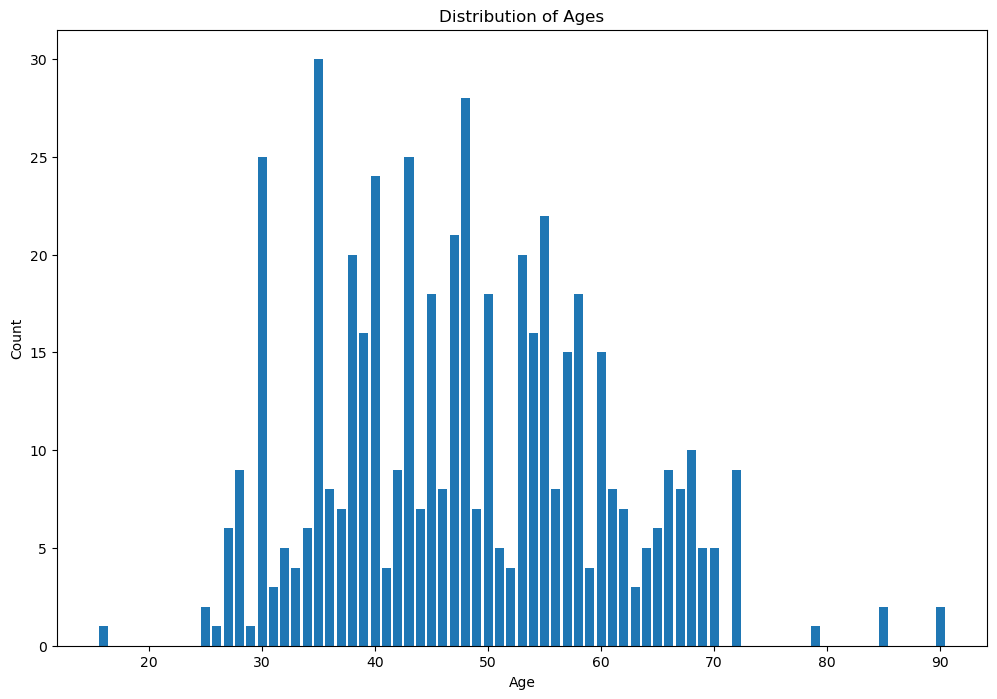

In [12]:
#plt.bar(x=df['Age'], data=df)
#plt.bar(data=df, x='Age')
age_counts = df1['Age'].value_counts()

plt.figure(figsize=(12,8))
plt.bar(x=age_counts.index, height=age_counts.values)
#plt.figure(figsize=(12,8))
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Ages')
plt.show()

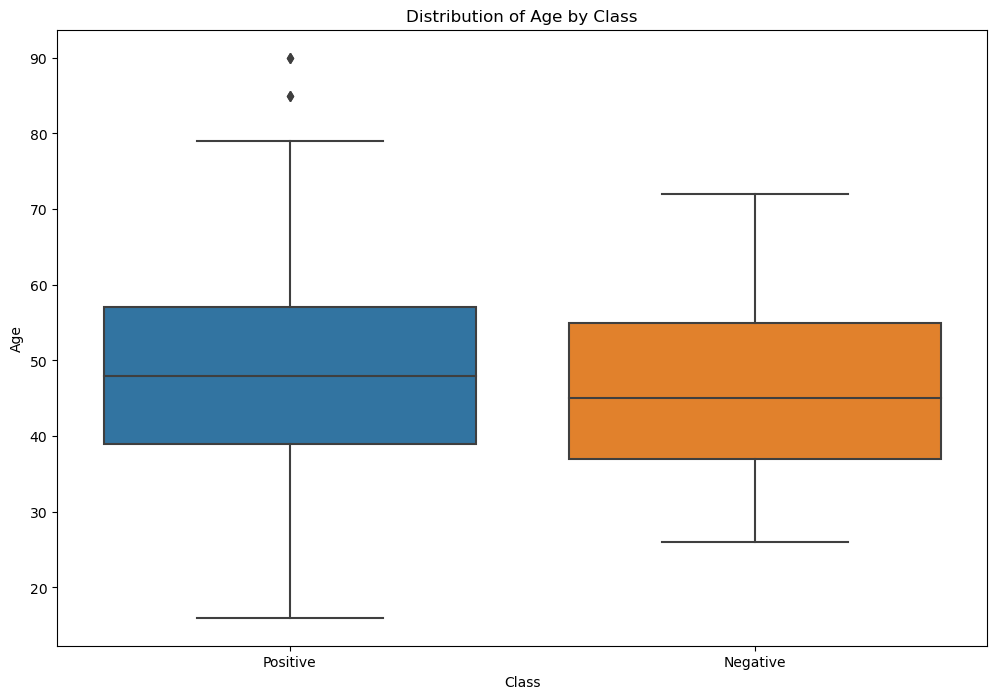

In [13]:
# Box plot to visualize the distribution of ages for each class
plt.figure(figsize=(12, 8))
sns.boxplot(x='class', y='Age', data=df1)
plt.title('Distribution of Age by Class')
plt.xlabel('Class')
plt.ylabel('Age')
plt.show()


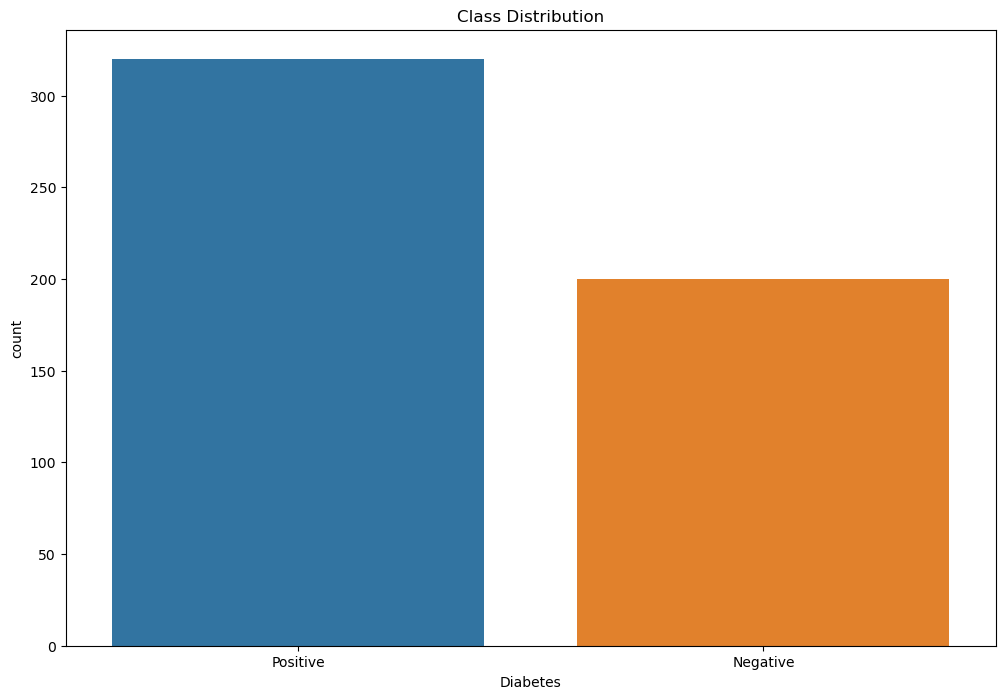

In [15]:
plt.figure(figsize=(12, 8))
plt.title('Class Distribution')
sns.countplot(data=df1, x='class')
plt.xlabel('Diabetes')
plt.show()

In [16]:
df1['Gender'].value_counts()

Male      328
Female    192
Name: Gender, dtype: int64

In [17]:
cat_data = df1.select_dtypes('object')
num_data = df1.select_dtypes('number')

In [18]:
num_features = num_data.columns
num_features

Index(['Age'], dtype='object')

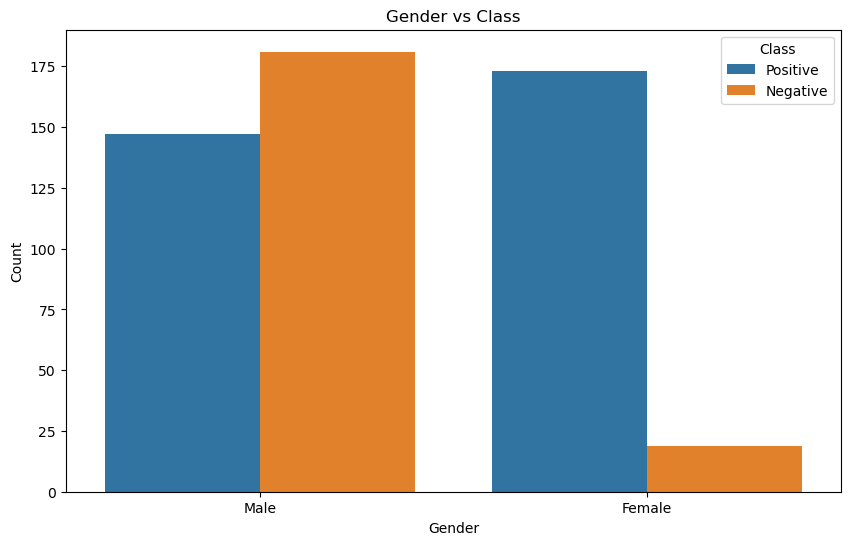

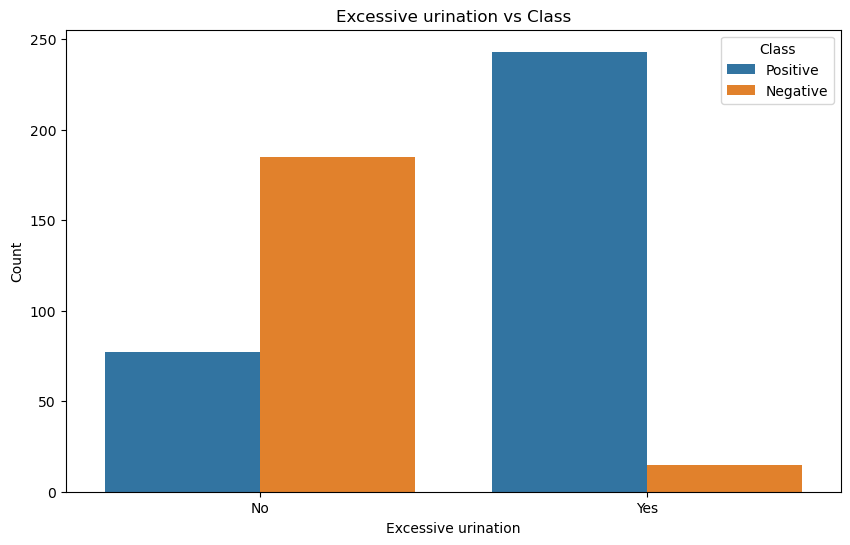

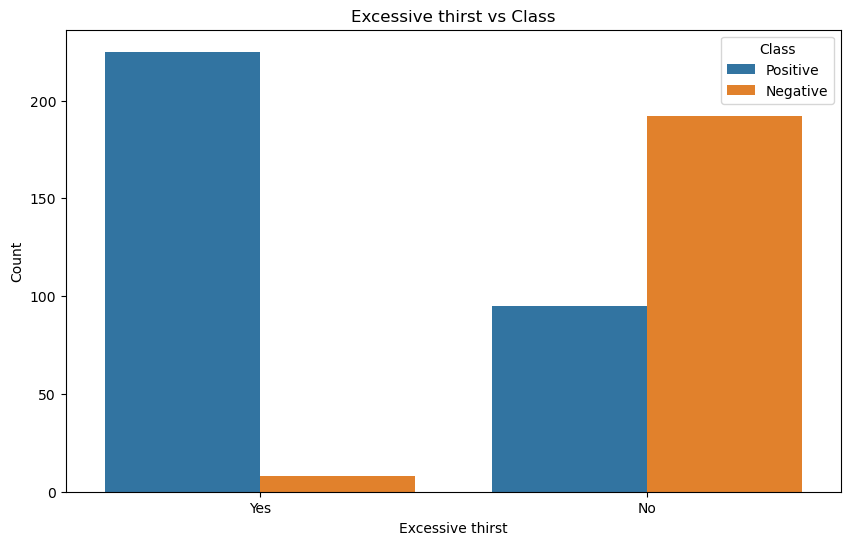

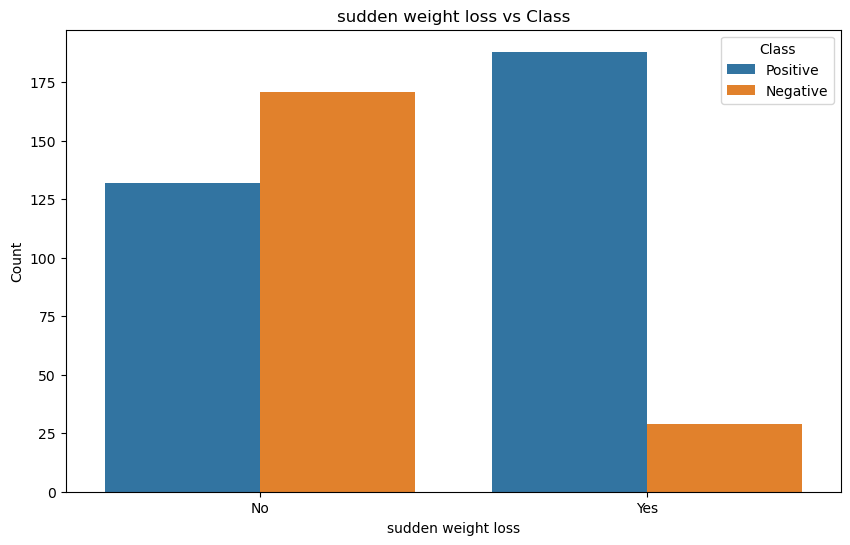

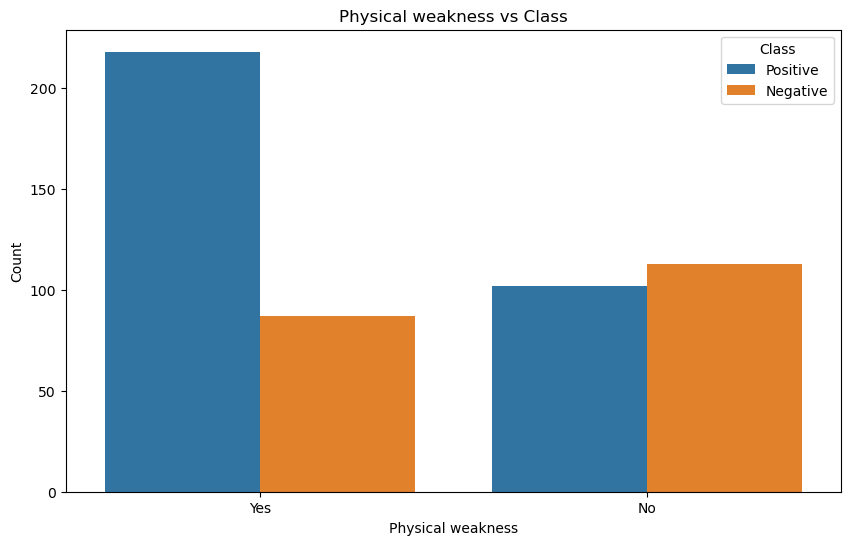

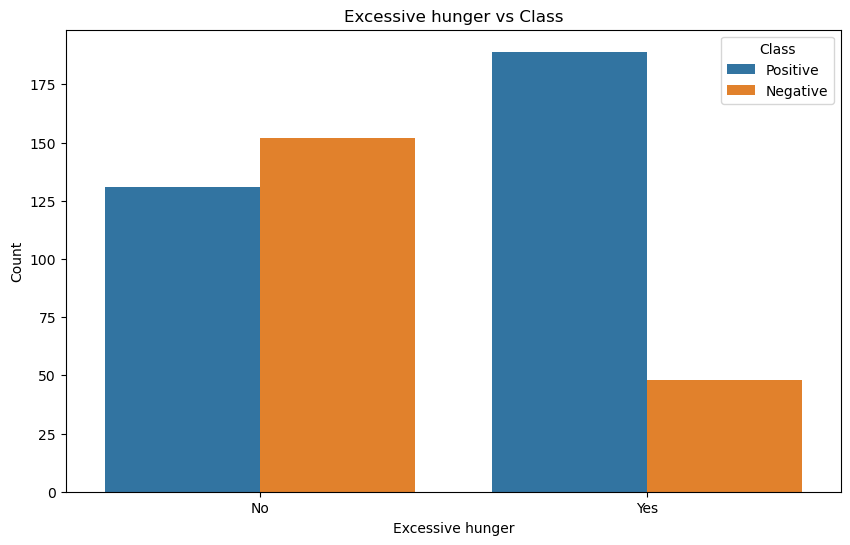

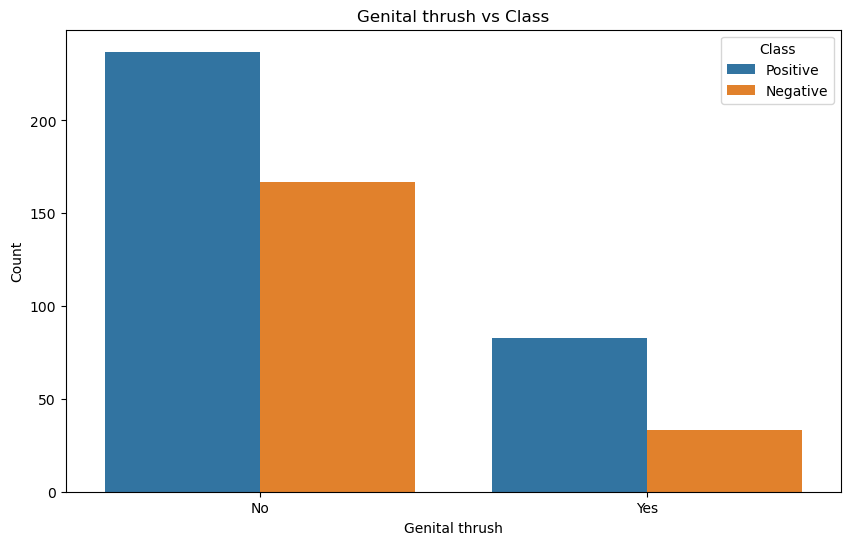

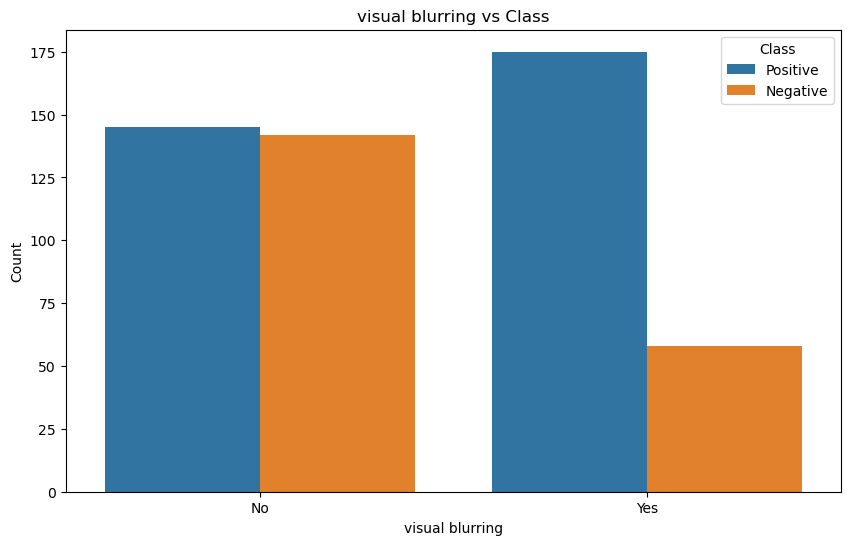

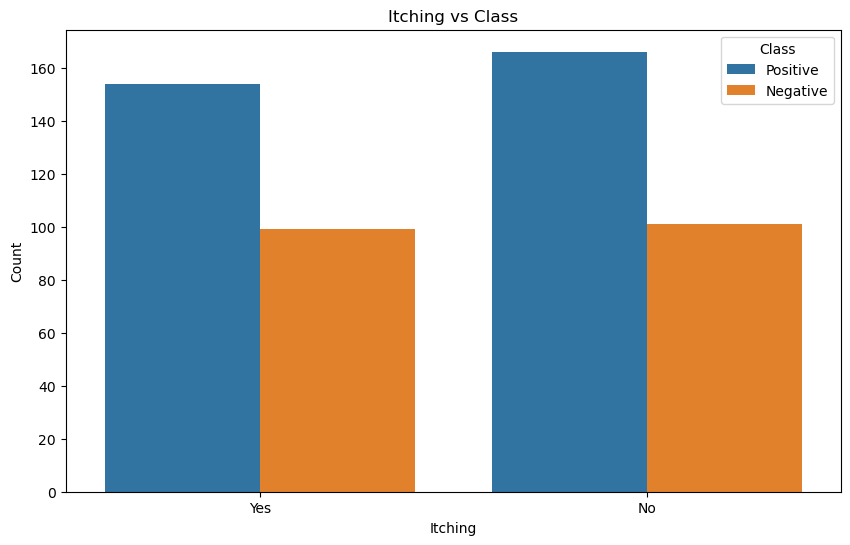

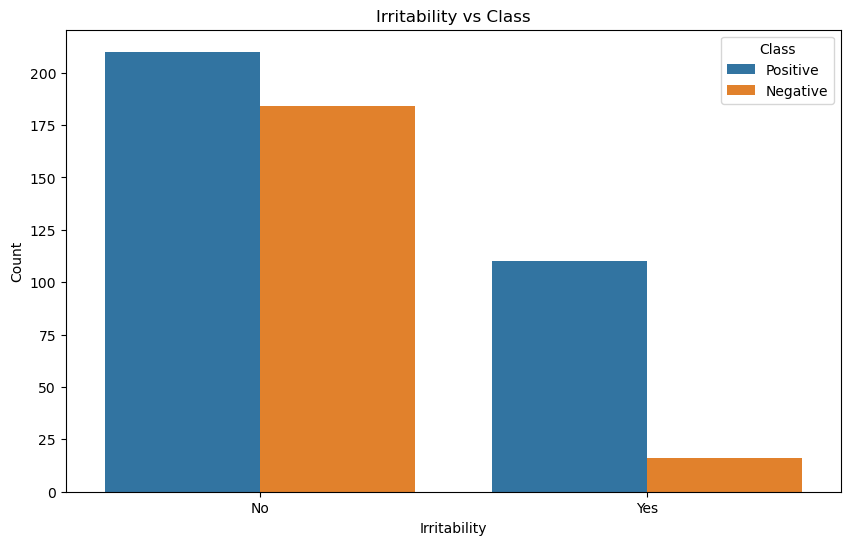

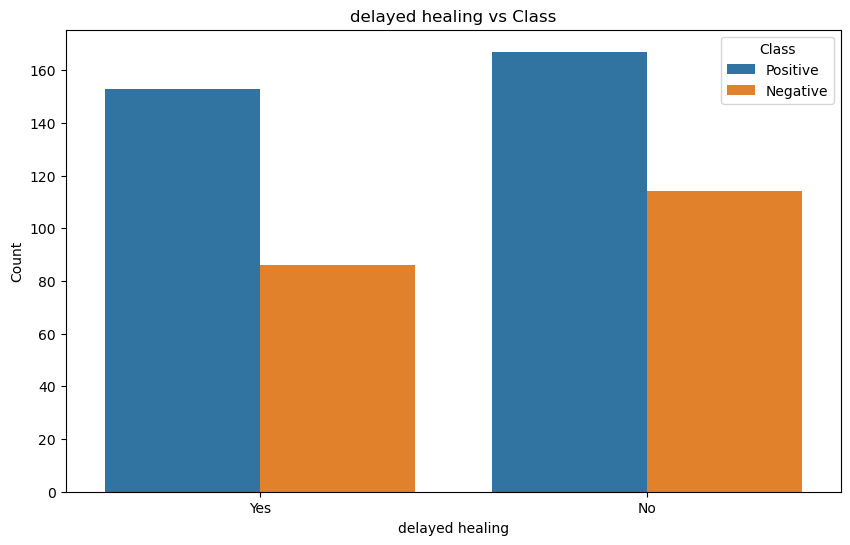

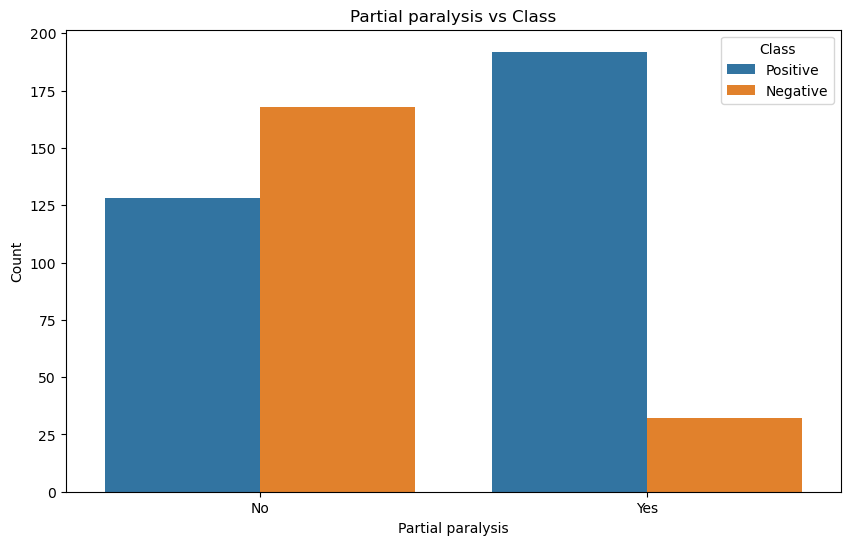

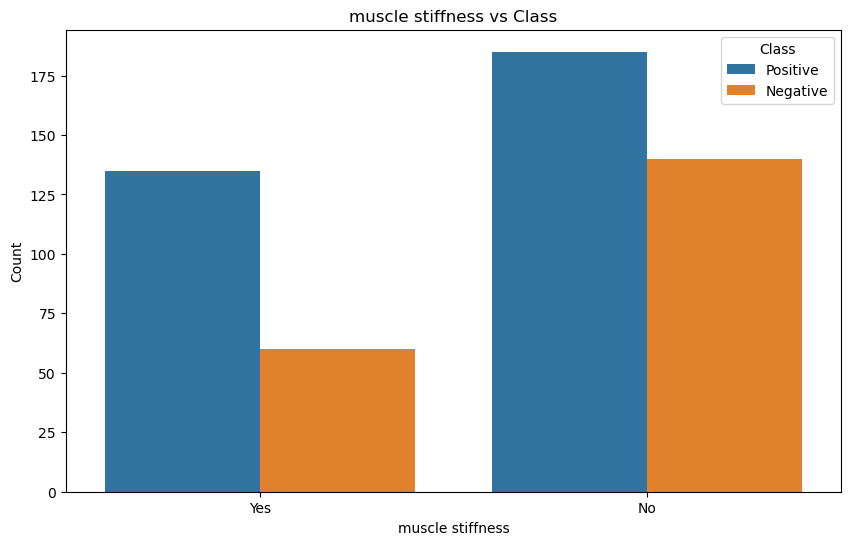

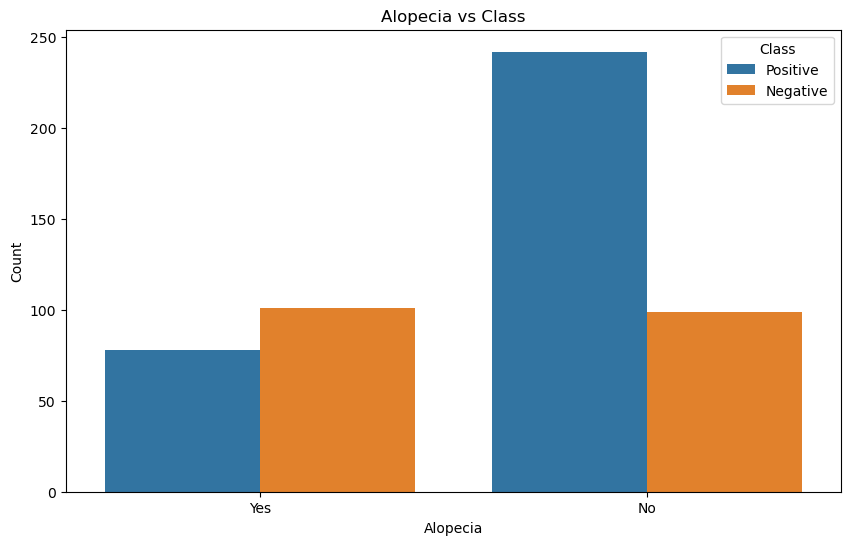

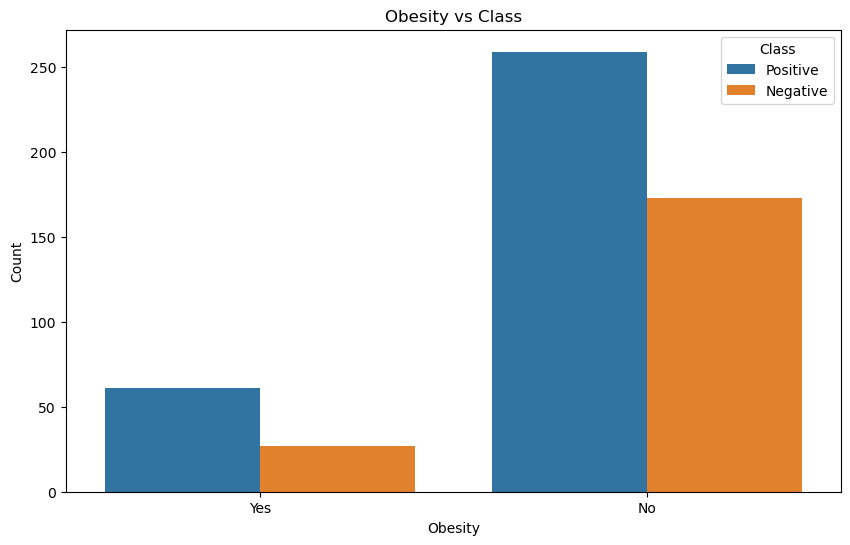

In [22]:
cat_features = cat_data.columns

for feature in cat_features:
    if feature != 'class':
        plt.figure(figsize=(10, 6))
        sns.countplot(x=feature, hue='class', data=df1)
        plt.title(f'{feature} vs Class')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.legend(title='Class', loc='upper right')
        plt.show()

The visualizations above compute the relationship between categorical features and the target 'class'

In [23]:
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Calculate Cramér's V for each pair of categorical variables with the target variable
target = 'class'

correlation_values = {}
for feature in cat_features:
    correlation_values[feature] = cramers_v(df1[feature], df1[target])
                                            
                                            
#correlation_values
rounded_correlation_values = {key: round(value, 2) for key, value in correlation_values.items()}
rounded_correlation_values

{'Gender': 0.44,
 'Excessive urination': 0.66,
 'Excessive thirst': 0.64,
 'sudden weight loss': 0.43,
 'Physical weakness': 0.24,
 'Excessive hunger': 0.34,
 'Genital thrush': 0.1,
 'visual blurring': 0.24,
 'Itching': 0.0,
 'Irritability': 0.29,
 'delayed healing': 0.0,
 'Partial paralysis': 0.43,
 'muscle stiffness': 0.11,
 'Alopecia': 0.26,
 'Obesity': 0.05,
 'class': 1.0}

The majority of categorical features have a significant positive correlation with the target variable 'class'. However, 'Itching' and 'delayed healing' have a correlation value of 0, indicating they have no quantifiable impact on the target variable.

In [24]:
X = train_set.drop(columns=['Itching','delayed healing','class'])
y = train_set['class'].copy()

In [25]:
X.columns

Index(['Age', 'Gender', 'Excessive urination', 'Excessive thirst',
       'sudden weight loss', 'Physical weakness', 'Excessive hunger',
       'Genital thrush', 'visual blurring', 'Irritability',
       'Partial paralysis', 'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')

In [26]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

#num_attribs = ['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
       #'Whole weight.2', 'Shell weight']
#cat_attribs = ['Sex']
num_features
cat_features

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features),
])

In [27]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=['object','category'])),
)

In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 416 entries, 434 to 102
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  416 non-null    int64 
 1   Gender               416 non-null    object
 2   Excessive urination  416 non-null    object
 3   Excessive thirst     416 non-null    object
 4   sudden weight loss   416 non-null    object
 5   Physical weakness    416 non-null    object
 6   Excessive hunger     416 non-null    object
 7   Genital thrush       416 non-null    object
 8   visual blurring      416 non-null    object
 9   Irritability         416 non-null    object
 10  Partial paralysis    416 non-null    object
 11  muscle stiffness     416 non-null    object
 12  Alopecia             416 non-null    object
 13  Obesity              416 non-null    object
dtypes: int64(1), object(13)
memory usage: 48.8+ KB


In [31]:
X_prepared = preprocessing.fit_transform(X)
X_prepared

array([[ 0.3866783 ,  0.        ,  1.        , ...,  1.        ,
         1.        ,  0.        ],
       [-0.59566168,  0.        ,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.46853996,  0.        ,  1.        , ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [-0.67752335,  1.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.71412496,  0.        ,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 3.4155599 ,  1.        ,  0.        , ...,  1.        ,
         1.        ,  0.        ]])

In [ ]:
feature_names = preprocessing.get_feature_names_out()

# Create a DataFrame from the encoded data
X_prepared_fr = pd.DataFrame(X_prepared, columns=feature_names, index=X.index)

# Print the first two rows
print(X_prepared_fr.head(2))

In [42]:
X_prepared_fr = pd.DataFrame(
    X_prepared,
    columns= preprocessing.get_feature_names_out(),
    index=X.index)
X_prepared_fr.head(2)

AttributeError: Estimator simpleimputer does not provide get_feature_names_out. Did you mean to call pipeline[:-1].get_feature_names_out()?

In [43]:
from sklearn.linear_model import LogisticRegression
log_reg = make_pipeline(preprocessing, LogisticRegression())
log_reg.fit(X,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001FC3521AE50>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                          

In [44]:
train_predictions = log_reg.predict(X)

In [45]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y,train_predictions))

              precision    recall  f1-score   support

    Negative       0.89      0.95      0.92       167
    Positive       0.96      0.92      0.94       249

    accuracy                           0.93       416
   macro avg       0.92      0.93      0.93       416
weighted avg       0.93      0.93      0.93       416



In [46]:
X_test = test_set.drop(columns=['Itching','delayed healing','class'])
y_test = test_set['class'].copy()

In [47]:
test_predictions = log_reg.predict(X_test)

In [48]:
print(classification_report(y_test,test_predictions))

              precision    recall  f1-score   support

    Negative       0.84      0.82      0.83        33
    Positive       0.92      0.93      0.92        71

    accuracy                           0.89       104
   macro avg       0.88      0.87      0.88       104
weighted avg       0.89      0.89      0.89       104



In [49]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = make_pipeline(preprocessing, RandomForestClassifier())
rf_clf.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001FC3521AE50>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                          

In [50]:
test_predictions2 = rf_clf.predict(X_test)

In [51]:
print(confusion_matrix(y_test,test_predictions2))

[[33  0]
 [ 1 70]]


In [52]:
print(classification_report(y_test,test_predictions2))

              precision    recall  f1-score   support

    Negative       0.97      1.00      0.99        33
    Positive       1.00      0.99      0.99        71

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



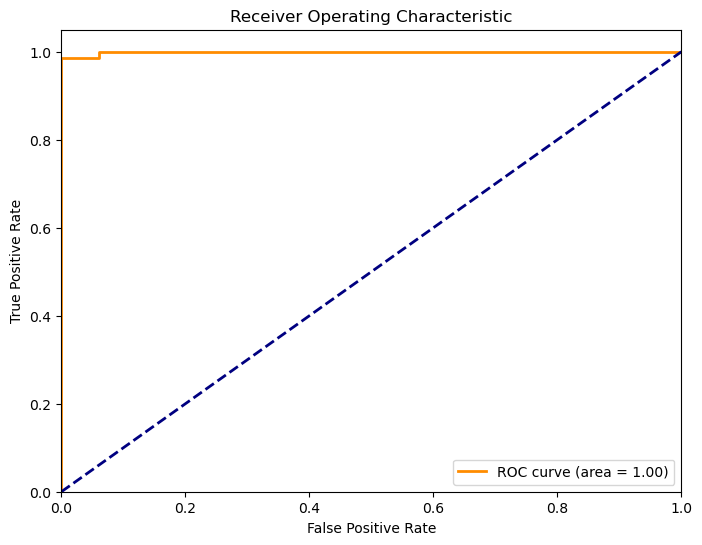

In [53]:
from sklearn.metrics import roc_curve, auc

# Convert target variable to numerical values (option 1)
y_true = y_test.map({'Negative': 0, 'Positive': 1})

# Make predictions on the test set
y_pred_proba = rf_clf.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)

# Alternative approach (option 2)
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label='Positive')

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Limitations of the Project:
1. Small Sample Size
2. Lack of Diversity: With only 520 instances, the dataset might not represent the full diversity of the problem domain, leading to a biased model that performs well on the training data but poorly on new, unseen data from different distributions